## 01. Data Generation

In [ ]:
!sudo python3 -m pip install mplot3d

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matploilib inline

UsageError: Line magic function `%matploilib` not found.


In [38]:
# Generating Dataset
num_data = 2400
x1 = np.random.rand(num_data) * 10
x2 = np.random.rand(num_data) * 10
e = np.random.normal(0, 0.5, num_data)
X = np.array([x1,x2]).T
y = 2*np.sin(x1) + np.log(0.5 * x2 **2 ) + e

In [39]:
# ====== Split Dataset into Train, Validation, Test ======#
train_X, train_y = X[:1600, :], y[:1600]
val_X, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

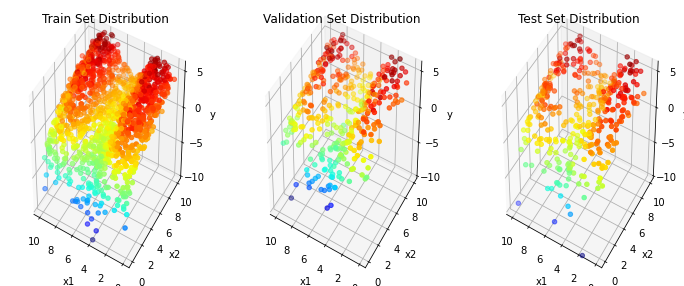

In [40]:
# ====== Visualize Each Dataset ====== #
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_X[:, 0], val_X[:, 1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

## 2. Hypothesis Define ( Model Define )
- H(x) = Wx + b 를 파이토치로 구현할 때는 단순하기 nn.Linear 모듈 사용 -> in_features : x의 차원 , out_features : y의 차원

In [41]:
import torch
import torch.nn as nn

In [42]:
class LinearModel(nn.Module):
     
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2 , out_features=1, bias=True)
        
    def forward(self, x):
        return self.linear(x)

In [43]:
class MLPModel(nn.Module):
    
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features = 2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

## 3. Cost Function Define ( Loss Function Define )
- [loss_function](https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html)
- MSE, Cross-Entropy, KL-Divergence 등

In [44]:
reg_loss = nn.MSELoss()

## 4. Train & Evaluation

In [45]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

In [46]:
# construct Model
model = MLPModel()

# 파라미터 수를 카운팅
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

801 parameters


In [47]:
# Construct Optimizer

# 학습 비율
lr = 0.005

# Optimizer
optimizer = optim.SGD(model.parameters(), lr = lr)

In [48]:
# 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_mae = []
list_mae_epoch = []

# 학습횟수 지정
epoch = 4000

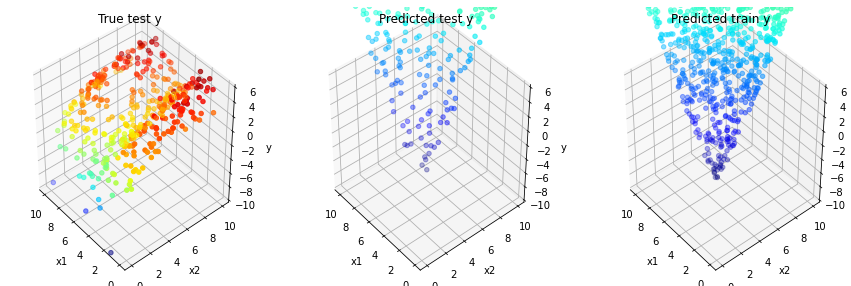

0 tensor(392.9308, grad_fn=<MseLossBackward>)


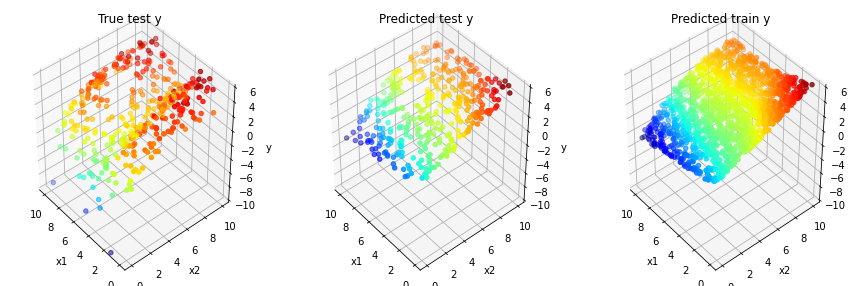

200 tensor(2.3560, grad_fn=<MseLossBackward>)


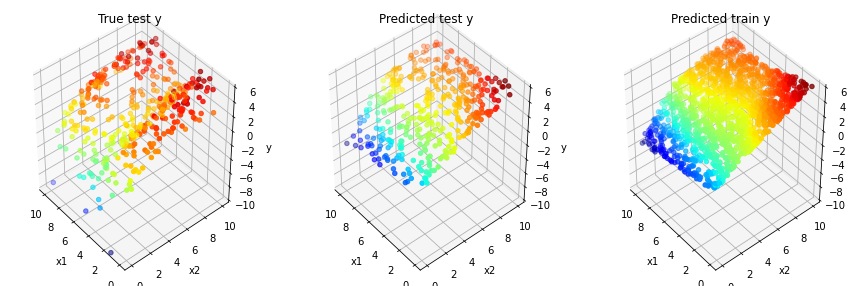

400 tensor(2.0880, grad_fn=<MseLossBackward>)


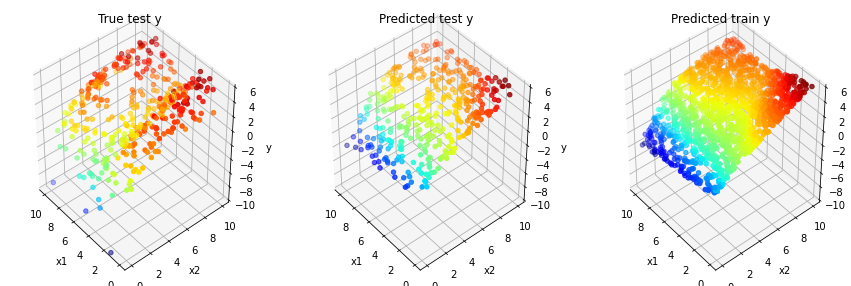

600 tensor(1.9278, grad_fn=<MseLossBackward>)


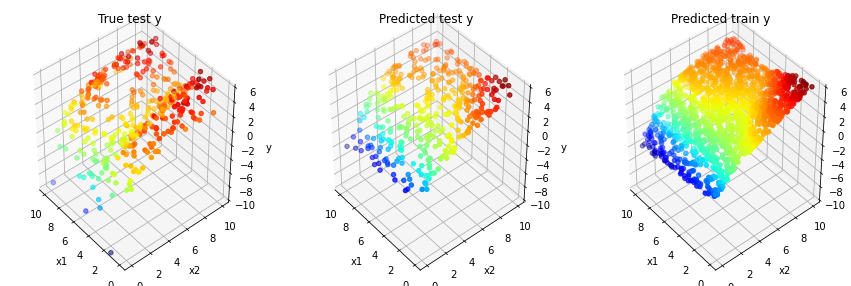

800 tensor(1.8245, grad_fn=<MseLossBackward>)


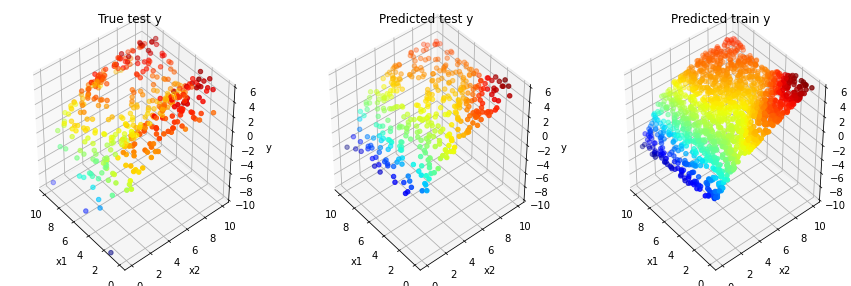

1000 tensor(1.7308, grad_fn=<MseLossBackward>)


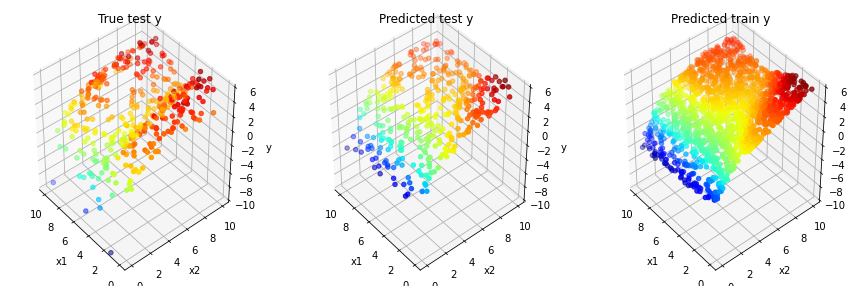

1200 tensor(1.6389, grad_fn=<MseLossBackward>)


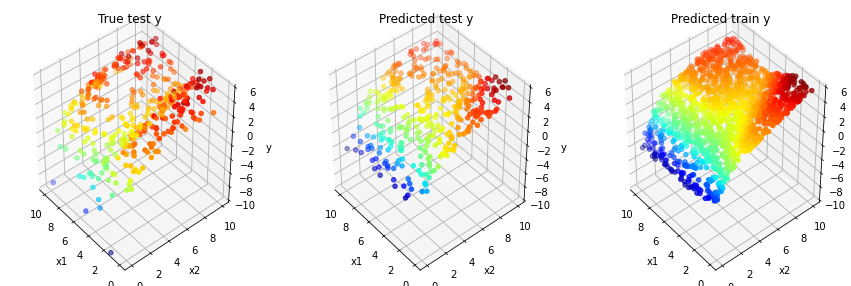

1400 tensor(1.5487, grad_fn=<MseLossBackward>)


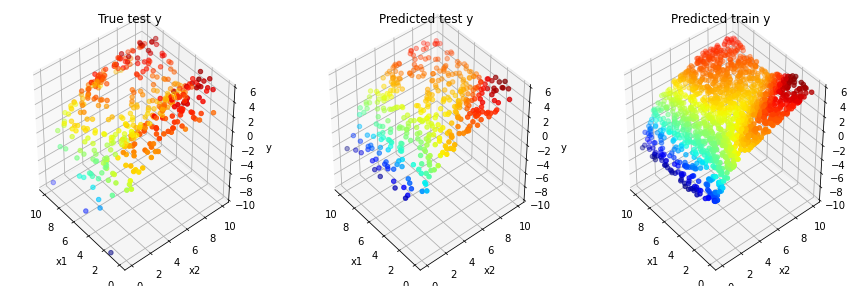

1600 tensor(1.4572, grad_fn=<MseLossBackward>)


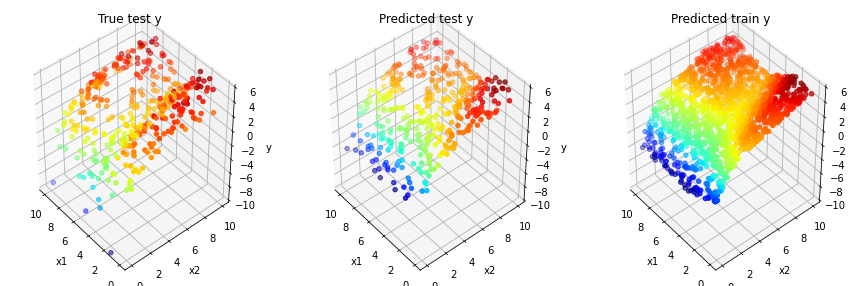

1800 tensor(1.3649, grad_fn=<MseLossBackward>)


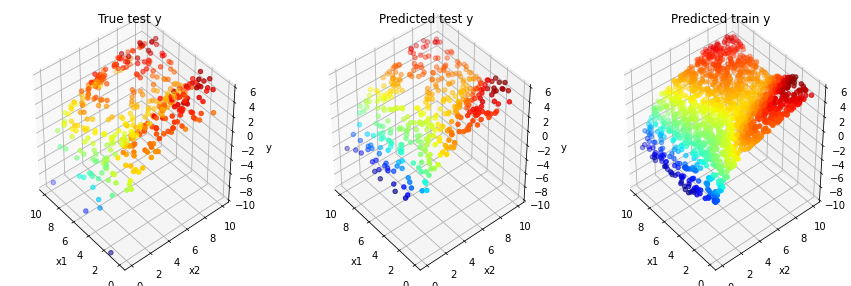

2000 tensor(1.2855, grad_fn=<MseLossBackward>)


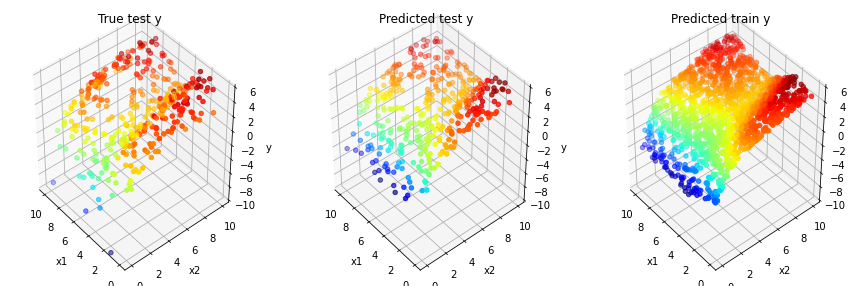

2200 tensor(1.2237, grad_fn=<MseLossBackward>)


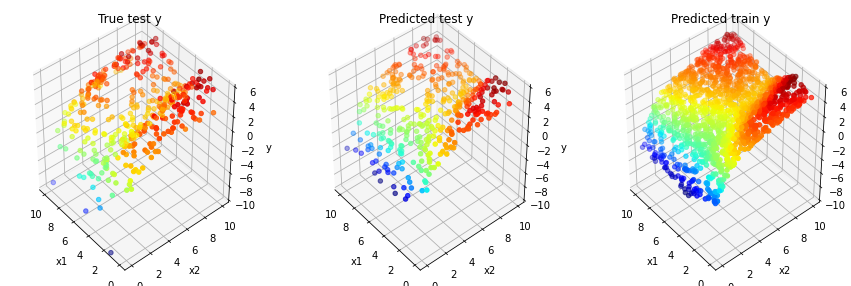

2400 tensor(1.1853, grad_fn=<MseLossBackward>)


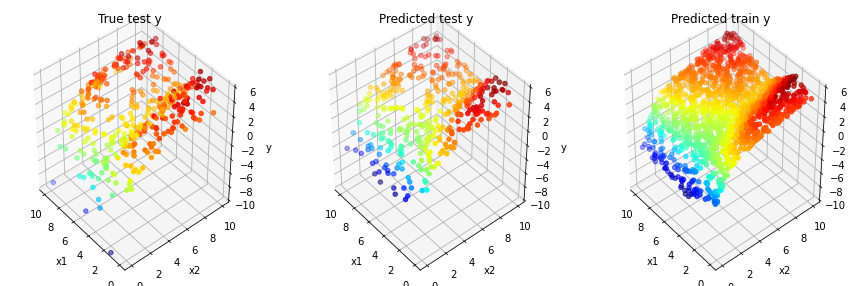

2600 tensor(1.1501, grad_fn=<MseLossBackward>)


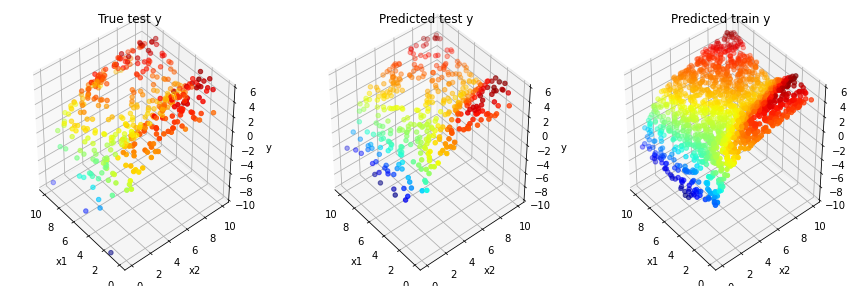

2800 tensor(1.1190, grad_fn=<MseLossBackward>)


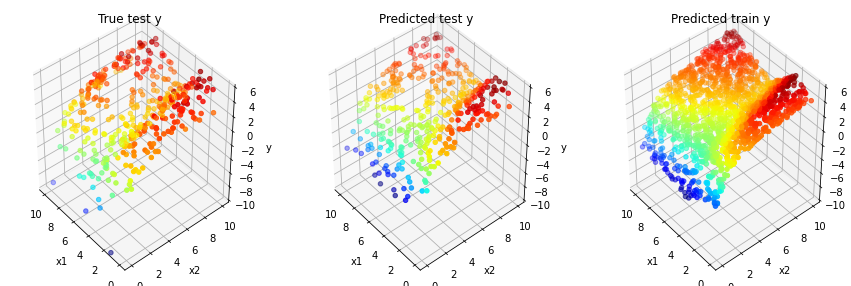

3000 tensor(1.1011, grad_fn=<MseLossBackward>)


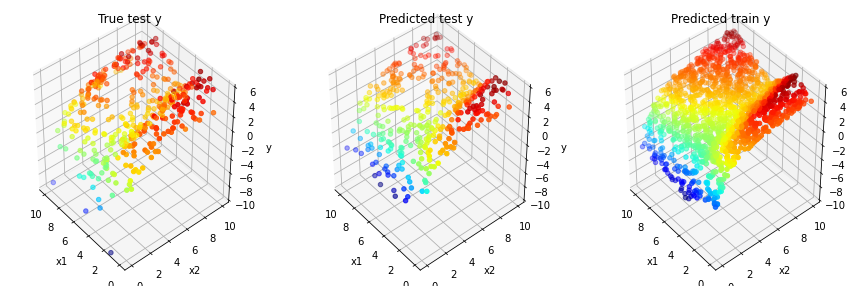

3200 tensor(1.0805, grad_fn=<MseLossBackward>)


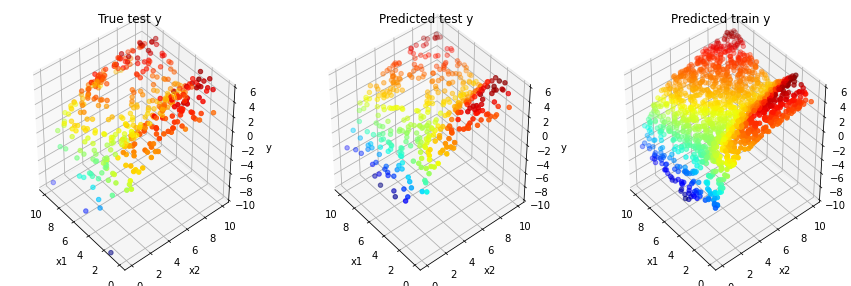

3400 tensor(1.0629, grad_fn=<MseLossBackward>)


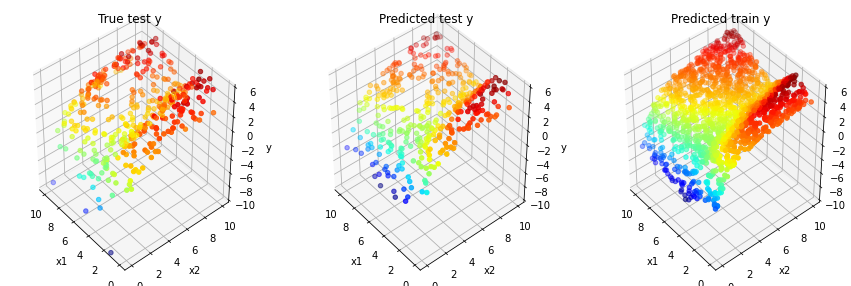

3600 tensor(1.0469, grad_fn=<MseLossBackward>)


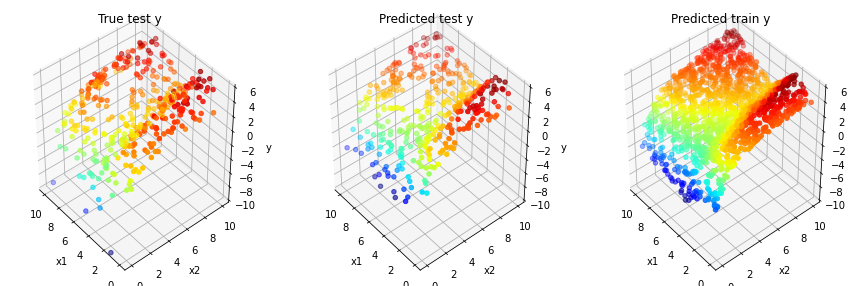

3800 tensor(1.0341, grad_fn=<MseLossBackward>)


In [49]:
for i in range(epoch):
    
    # train
    model.train()
    
    # optimizer 0으로 초기화
    optimizer.zero_grad()
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model(input_x)
    
#     print(input_x.shape, true_y.shape, pred_y.shape) # 각 인풋과 아웃풋의 차원을 체크
    
    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward() # 그레디언트 계산
    optimizer.step() # 그레디언트, 파라미터 업데이트
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    # Validation
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y)
    pred_y = model(input_x)
    loss = reg_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    
    # Evaluation
    
    if i % 200 == 0:
        
        # Calculate MAE
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy()
        mae = mean_absolute_error(true_y, pred_y)
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
         
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

## 5. Report Experiment

In [51]:
len(list_epoch), len(list_val_loss)

(4000, 4000)

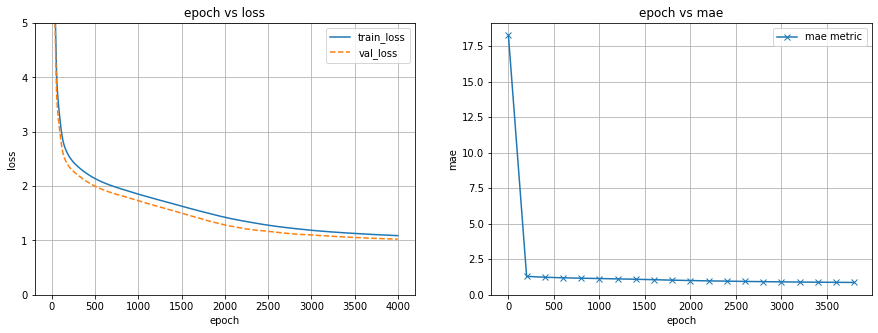

In [53]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch,list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')


plt.show()



In [54]:
# question = squeez, detach 알아두기